<h1 style="color:red;"> HOUSE SALE PREDICTION PROJECT </h1>

## The Data

I have used the data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [447]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [448]:
df = pd.read_csv("kc_house_data.csv")

In [449]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [450]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [451]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00




## EXPLORATORY DATA ANALYSIS



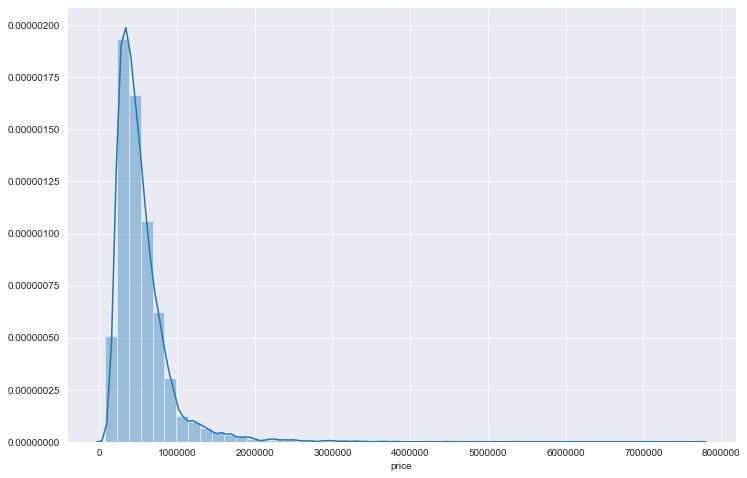

In [452]:
plt.figure(figsize= (12,8))
sns.set_style("darkgrid")
sns.distplot(df['price'])

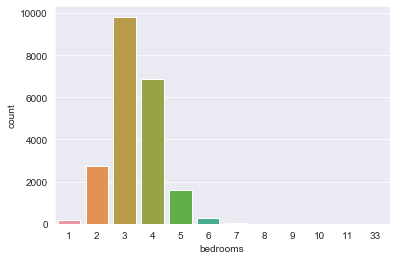

In [453]:
sns.countplot(df['bedrooms'])

In [454]:
# finding out features by their correlation with target class

In [455]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

### Geographical Properties

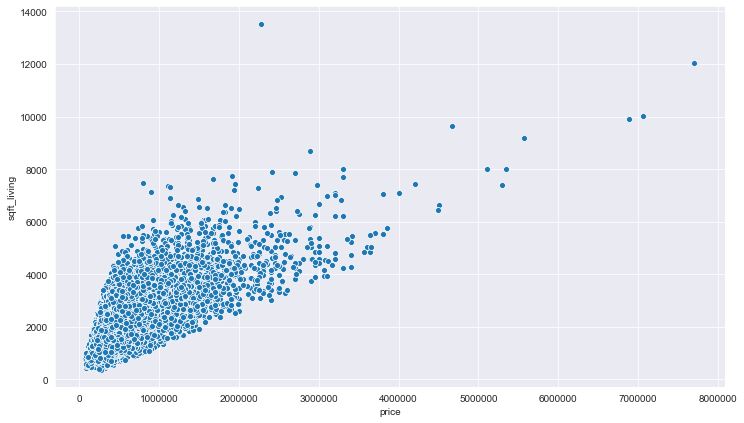

In [456]:
plt.figure(figsize=(12,7))
sns.scatterplot(x="price", y="sqft_living", data=df)
# we can see linear relation

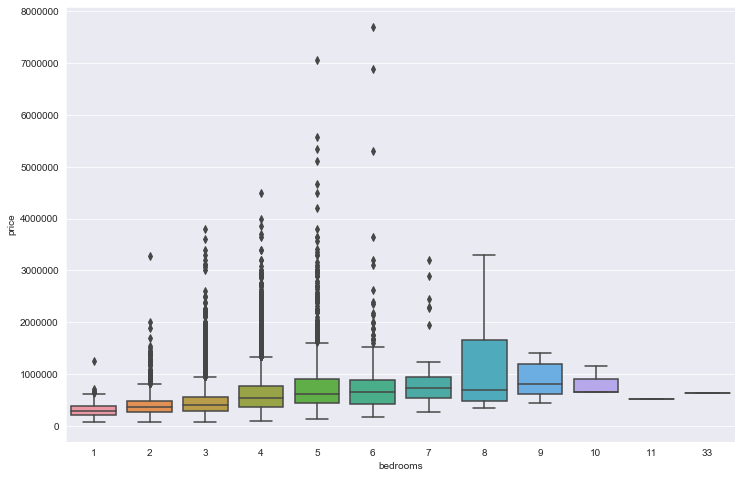

In [457]:
plt.figure(figsize=(12,8))
sns.boxplot(x="bedrooms", y="price", data=df)

In [458]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

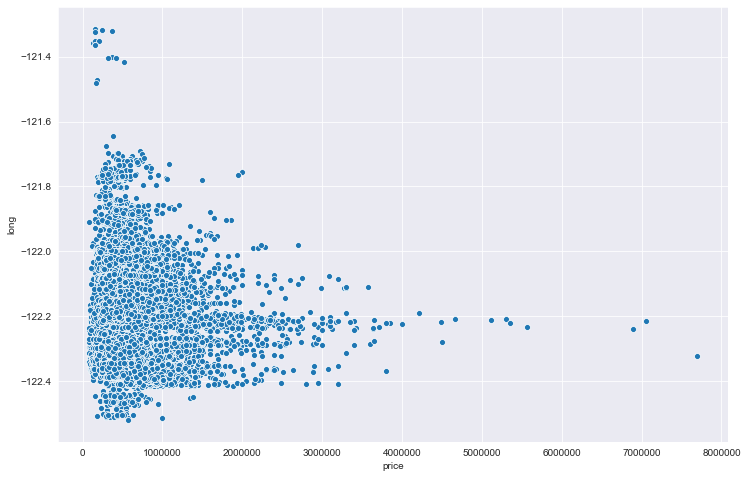

In [459]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='long', data=df)

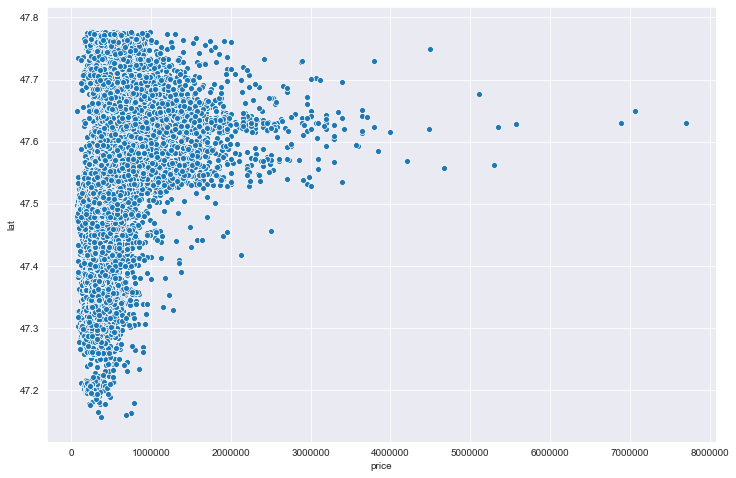

In [460]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='lat', data=df)

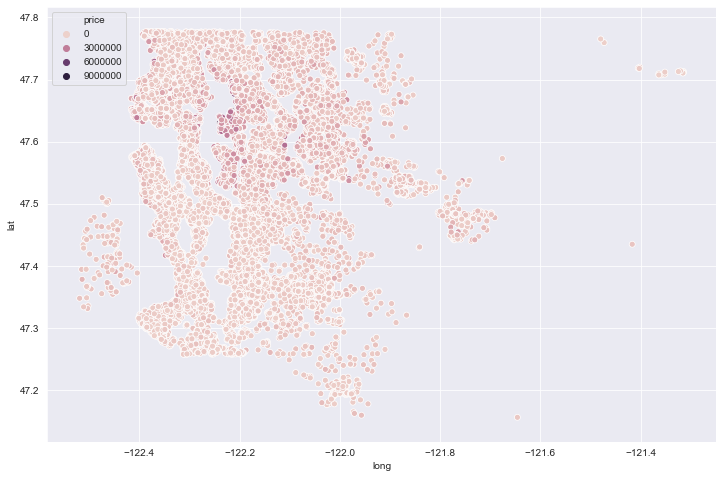

In [461]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=df, hue='price')
# the figure will look like the king county map(area of the dataset)

In [462]:
df.sort_values('price', ascending= False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


    **We Drop the High Price Data, as it is less and will cause  **

In [463]:
df= df[df['price'] < 1000000]

In [464]:
len(df)

20107

In [465]:
non_top_1_perc = df.sort_values('price', ascending='False').iloc[216:]

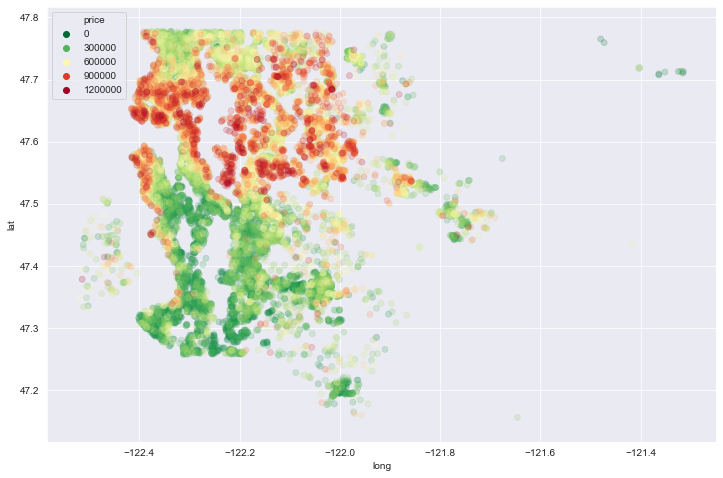

In [466]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=non_top_1_perc, hue='price', palette="RdYlGn_r", edgecolor=None, alpha=0.2)

### Exploring some other features

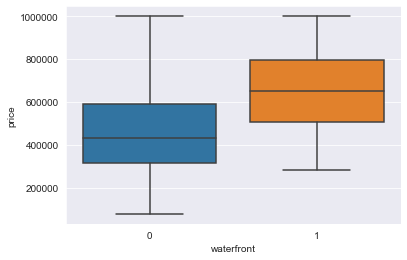

In [467]:
sns.boxplot(x="waterfront", y="price", data=df)

### Working With Feature Data

In [468]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [469]:
df = df.drop('id', axis=1)

### Feature Engineering from Date

In [470]:
len(df)

20107

In [471]:
df['date'] = pd.to_datetime(df['date'])

In [472]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 20107, dtype: datetime64[ns]

In [473]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [474]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


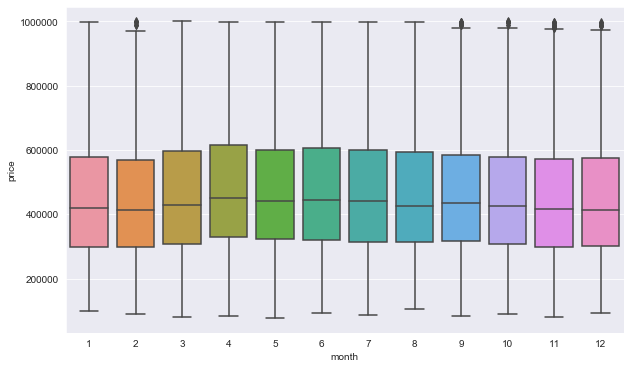

In [475]:
plt.figure(figsize= (10,6))
sns.boxplot(x='month', y='price', data=df)

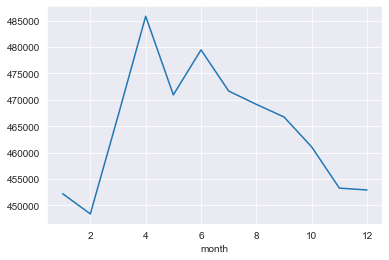

In [476]:
df.groupby('month').mean()['price'].plot()

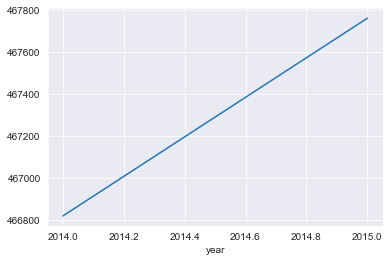

In [477]:
df.groupby('year').mean()['price'].plot()

In [478]:
df = df.drop('date', axis=1)

In [479]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


*zipcode: model might take it as a normal number (one greater than the other), hence I have dropped it*

In [480]:
df['zipcode'].value_counts() #too many zipcodes to use get_dummies

98038    586
98103    576
98052    552
98115    548
98042    547
        ... 
98109     81
98102     81
98024     72
98148     57
98039      5
Name: zipcode, Length: 70, dtype: int64

In [481]:
df= df.drop('zipcode', axis=1)

In [482]:
df['yr_renovated'].value_counts() #latest renovation higher price

0       19375
2014       78
2013       31
2000       29
2007       28
        ...  
1954        1
1944        1
1959        1
1934        1
1948        1
Name: yr_renovated, Length: 70, dtype: int64

In [483]:
df['sqft_basement'].value_counts()

0       12536
600       213
500       209
700       201
800       185
        ...  
602         1
1730        1
1810        1
1890        1
1135        1
Name: sqft_basement, Length: 267, dtype: int64

###  Scaling And Train Test Split

In [484]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [485]:
from sklearn.model_selection import train_test_split

In [486]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3, random_state=101)

### Scaling

In [487]:
from sklearn.preprocessing import MinMaxScaler

In [488]:
scaler= MinMaxScaler()

In [489]:
X_train = scaler.fit_transform(X_train)

In [490]:
X_test = scaler.transform(X_test)

### Creating a Model

In [491]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [492]:
# from tensorflow.keras.layers import Dropout

In [493]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [494]:
model.fit(x=X_train, y= y_train, validation_data=(X_test, y_test),
         batch_size=128, epochs=400)

Epoch 1/400
110/110 [==============================] - 0s 4ms/step - loss: 256838909952.0000 - val_loss: 255382568960.0000
Epoch 2/400
110/110 [==============================] - 0s 2ms/step - loss: 256149635072.0000 - val_loss: 252970024960.0000
Epoch 3/400
110/110 [==============================] - 0s 2ms/step - loss: 245988753408.0000 - val_loss: 229218942976.0000
Epoch 4/400
110/110 [==============================] - 0s 3ms/step - loss: 194205843456.0000 - val_loss: 143803072512.0000
Epoch 5/400
110/110 [==============================] - 0s 3ms/step - loss: 88378556416.0000 - val_loss: 41162629120.0000
Epoch 6/400
110/110 [==============================] - 0s 2ms/step - loss: 29442086912.0000 - val_loss: 24965724160.0000
Epoch 7/400
110/110 [==============================] - 0s 2ms/step - loss: 25219500032.0000 - val_loss: 24638699520.0000
Epoch 8/400
110/110 [==============================] - 0s 2ms/step - loss: 24917639168.0000 - val_loss: 24363231232.0000
Epoch 9/400
110/110 [===

110/110 [==============================] - 0s 3ms/step - loss: 12415683584.0000 - val_loss: 12501438464.0000
Epoch 69/400
110/110 [==============================] - 0s 3ms/step - loss: 12395492352.0000 - val_loss: 12487458816.0000
Epoch 70/400
110/110 [==============================] - 0s 2ms/step - loss: 12378317824.0000 - val_loss: 12480036864.0000
Epoch 71/400
110/110 [==============================] - 0s 3ms/step - loss: 12363500544.0000 - val_loss: 12490318848.0000
Epoch 72/400
110/110 [==============================] - 1s 5ms/step - loss: 12350872576.0000 - val_loss: 12442008576.0000
Epoch 73/400
110/110 [==============================] - 0s 3ms/step - loss: 12326012928.0000 - val_loss: 12428947456.0000
Epoch 74/400
110/110 [==============================] - 0s 4ms/step - loss: 12310377472.0000 - val_loss: 12411137024.0000
Epoch 75/400
110/110 [==============================] - 1s 5ms/step - loss: 12297017344.0000 - val_loss: 12392907776.0000
Epoch 76/400
110/110 [===============

110/110 [==============================] - 0s 3ms/step - loss: 11766017024.0000 - val_loss: 11902563328.0000
Epoch 135/400
110/110 [==============================] - 0s 3ms/step - loss: 11769473024.0000 - val_loss: 11859775488.0000
Epoch 136/400
110/110 [==============================] - 0s 3ms/step - loss: 11766404096.0000 - val_loss: 11848942592.0000
Epoch 137/400
110/110 [==============================] - 0s 4ms/step - loss: 11765893120.0000 - val_loss: 11847375872.0000
Epoch 138/400
110/110 [==============================] - 0s 4ms/step - loss: 11755838464.0000 - val_loss: 11836041216.0000
Epoch 139/400
110/110 [==============================] - 0s 3ms/step - loss: 11755096064.0000 - val_loss: 11838455808.0000
Epoch 140/400
110/110 [==============================] - 0s 4ms/step - loss: 11746302976.0000 - val_loss: 11833484288.0000
Epoch 141/400
110/110 [==============================] - 0s 3ms/step - loss: 11737567232.0000 - val_loss: 11829433344.0000
Epoch 142/400
110/110 [=======

110/110 [==============================] - 0s 3ms/step - loss: 11543456768.0000 - val_loss: 11637220352.0000
Epoch 201/400
110/110 [==============================] - 0s 3ms/step - loss: 11549331456.0000 - val_loss: 11646553088.0000
Epoch 202/400
110/110 [==============================] - 0s 3ms/step - loss: 11544852480.0000 - val_loss: 11635011584.0000
Epoch 203/400
110/110 [==============================] - 0s 3ms/step - loss: 11546079232.0000 - val_loss: 11621179392.0000
Epoch 204/400
110/110 [==============================] - 0s 3ms/step - loss: 11541597184.0000 - val_loss: 11620020224.0000
Epoch 205/400
110/110 [==============================] - 0s 3ms/step - loss: 11550388224.0000 - val_loss: 11620179968.0000
Epoch 206/400
110/110 [==============================] - 0s 3ms/step - loss: 11543037952.0000 - val_loss: 11626986496.0000
Epoch 207/400
110/110 [==============================] - 0s 3ms/step - loss: 11537702912.0000 - val_loss: 11611951104.0000
Epoch 208/400
110/110 [=======

110/110 [==============================] - 0s 4ms/step - loss: 11432471552.0000 - val_loss: 11505892352.0000
Epoch 267/400
110/110 [==============================] - 0s 2ms/step - loss: 11439706112.0000 - val_loss: 11509396480.0000
Epoch 268/400
110/110 [==============================] - 0s 2ms/step - loss: 11428504576.0000 - val_loss: 11566730240.0000
Epoch 269/400
110/110 [==============================] - 0s 2ms/step - loss: 11432822784.0000 - val_loss: 11500356608.0000
Epoch 270/400
110/110 [==============================] - 0s 3ms/step - loss: 11428501504.0000 - val_loss: 11584040960.0000
Epoch 271/400
110/110 [==============================] - 1s 5ms/step - loss: 11441335296.0000 - val_loss: 11499458560.0000
Epoch 272/400
110/110 [==============================] - 0s 3ms/step - loss: 11424011264.0000 - val_loss: 11498284032.0000
Epoch 273/400
110/110 [==============================] - 0s 3ms/step - loss: 11423097856.0000 - val_loss: 11491899392.0000
Epoch 274/400
110/110 [=======

110/110 [==============================] - 0s 5ms/step - loss: 11322565632.0000 - val_loss: 11400150016.0000
Epoch 333/400
110/110 [==============================] - 0s 4ms/step - loss: 11324562432.0000 - val_loss: 11408107520.0000
Epoch 334/400
110/110 [==============================] - 0s 3ms/step - loss: 11328762880.0000 - val_loss: 11392849920.0000
Epoch 335/400
110/110 [==============================] - 0s 3ms/step - loss: 11321703424.0000 - val_loss: 11402146816.0000
Epoch 336/400
110/110 [==============================] - 0s 2ms/step - loss: 11319640064.0000 - val_loss: 11392053248.0000
Epoch 337/400
110/110 [==============================] - 0s 3ms/step - loss: 11326872576.0000 - val_loss: 11406256128.0000
Epoch 338/400
110/110 [==============================] - 0s 3ms/step - loss: 11317255168.0000 - val_loss: 11395126272.0000
Epoch 339/400
110/110 [==============================] - 0s 2ms/step - loss: 11321228288.0000 - val_loss: 11412235264.0000
Epoch 340/400
110/110 [=======

110/110 [==============================] - 0s 4ms/step - loss: 11238780928.0000 - val_loss: 11297286144.0000
Epoch 399/400
110/110 [==============================] - 0s 3ms/step - loss: 11229127680.0000 - val_loss: 11296311296.0000
Epoch 400/400
110/110 [==============================] - 0s 3ms/step - loss: 11238676480.0000 - val_loss: 11294595072.0000


In [495]:
losses= pd.DataFrame(model.history.history)

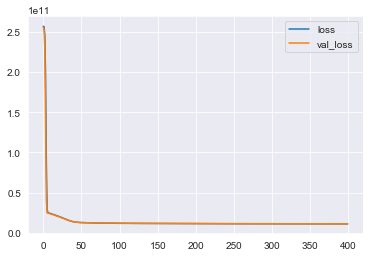

In [496]:
losses.plot() #compares training and testing loss

In [497]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [498]:
predictions = model.predict(X_test)

In [499]:
np.sqrt(mean_squared_error(y_test, predictions))

106276.03152065411

In [500]:
mean_absolute_error(y_test, predictions)

79851.64978555444

In [501]:
df['price'].describe()

count     20107.000000
mean     467124.140747
std      195500.712454
min       78000.000000
25%      314000.000000
50%      433200.000000
75%      592225.000000
max      999999.000000
Name: price, dtype: float64

##### explained_variance_score(y_test, predictions)

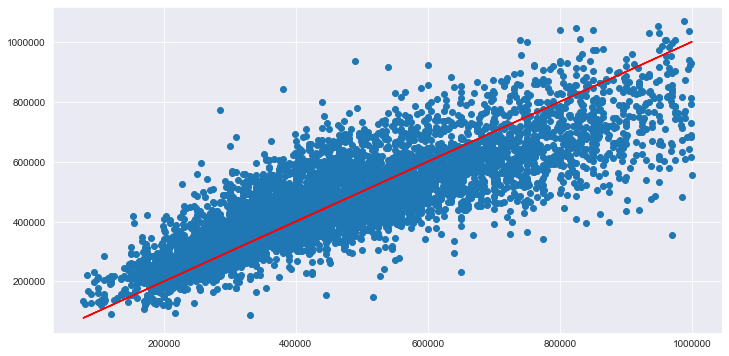

In [502]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

### Predicting the Price for an Example

In [503]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


*Predicting and comparing with the Price based on Row 4 features*

In [504]:
single_house = df.drop('price', axis=1).iloc[4]

In [505]:
single_house = scaler.transform (single_house.values.reshape(-1, 19))

In [506]:
print('The Precticted Cost :', model.predict(single_house)[0][0])
print('The Actual Cost : ', df.iloc[4]['price'])

The Precticted Cost : 466684.38
The Actual Cost :  510000.0
